In [17]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem import MACCSkeys

In [3]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

RDKit WARNING: [15:12:58]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:58]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:58]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:58]  S group DAT ignored on line 2516
RDKit WARNING: [15:12:58]  S group DAT ignored on line 15552
RDKit WARNING: [15:12:58]  S group DAT ignored on line 15552
RDKit WARNING: [15:12:58]  S group DAT ignored on line 15552
RDKit WARNING: [15:12:58]  S group DAT ignored on line 15552
RDKit ERROR: [15:12:58] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:12:58] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:12:58] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:12:58] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:12:58]  S group GEN ignored on line 102860
RDKit ERROR: [15:12:58] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:12:58]  Unhand

RDKit ERROR: [15:13:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [15:13:01] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:13:01] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [15:13:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:13:01] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:13:01] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [15:13:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:13:01] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:13:01] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [15:13:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:13:01] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [15:13:02] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [15:13:02] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:13:02] ERROR: Could not sanitize molecule ending on line 640674
RDKit ERROR: [15:13:02] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:13:02] Explicit valence for atom # 17 Mg, 4, is greater than permitted
RDKit ERROR: [15:13:02] ERROR: Could not sanitize molecule ending on line 642835
RDKit ERROR: [15:13:02] ERROR: Explicit valence for atom # 17 Mg, 4, is greater than permitted
RDKit ERROR: [15:13:02] Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [15:13:02] ERROR: Could not sanitize molecule ending on line 645068
RDKit ERROR: [15:13:02] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [15:13:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:13:02]

In [5]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [6]:
DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666])

0.14516129032258066

In [ ]:
#ukol: najít 10 nejpodobnějších látek, aspirinu podle nějaké zvolené metriky (v tomto případě tanimoto distance)

In [7]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")

In [8]:
aspirin_fp = Chem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)

In [9]:
similarities_to_aspirin_fp = [DataStructs.FingerprintSimilarity(aspirin_fp, fp, metric=DataStructs.TanimotoSimilarity) for fp in morgan_fps]

In [10]:
similarities_to_aspirin_fp[:10]

[0.12389380530973451,
 0.10317460317460317,
 0.09259259259259259,
 0.10434782608695652,
 0.05555555555555555,
 0.10101010101010101,
 0.10891089108910891,
 0.11538461538461539,
 0.051470588235294115,
 0.09210526315789473]

In [12]:
similarity_hits = sorted(zip(drugbank, similarities_to_aspirin_fp), key=lambda x: x[1], reverse=True)
similarity_hits

[(<rdkit.Chem.rdchem.Mol at 0x7f067b439d50>, 1.0),
 (<rdkit.Chem.rdchem.Mol at 0x7f067afee990>, 0.6129032258064516),
 (<rdkit.Chem.rdchem.Mol at 0x7f067afdadf0>, 0.5277777777777778),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b007c60>, 0.52),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b439a80>, 0.4642857142857143),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b0206c0>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b01e620>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7f067affead0>, 0.42424242424242425),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b430350>, 0.4166666666666667),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b018440>, 0.3888888888888889),
 (<rdkit.Chem.rdchem.Mol at 0x7f067aff36c0>, 0.3870967741935484),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b007d00>, 0.38461538461538464),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b0296c0>, 0.3793103448275862),
 (<rdkit.Chem.rdchem.Mol at 0x7f067afcf120>, 0.37209302325581395),
 (<rdkit.Chem.rdchem.Mol at 0x7f067b005850>, 0.37142857142857144),
 (<rdkit.Chem.rdchem.Mol at 0x7f0

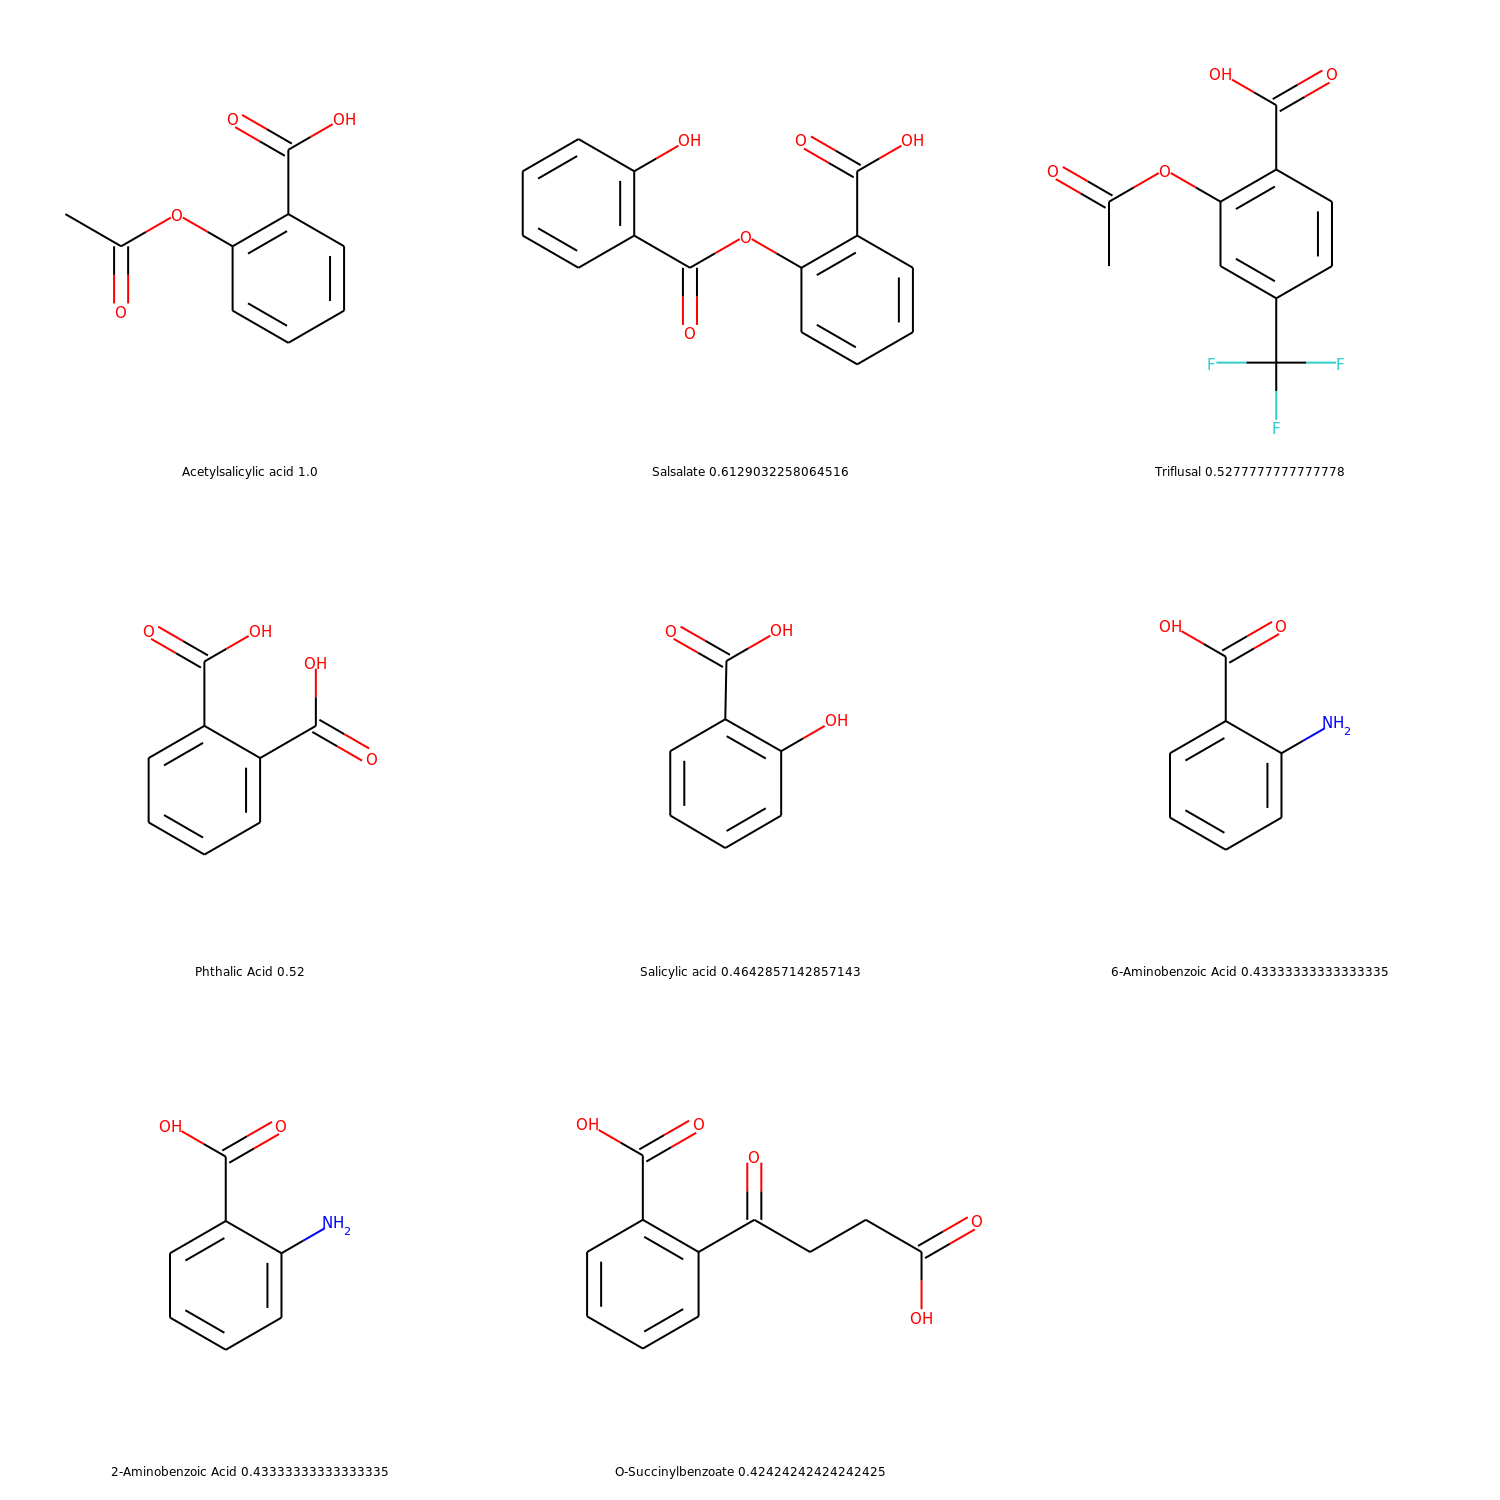

In [15]:
Draw.MolsToGridImage([m[0] for m in similarity_hits[:8]], subImgSize=(500, 500), legends=[m[0].GetProp('GENERIC_NAME') + ' ' + str(m[1]) for m in similarity_hits[:8]])

In [ ]:
#teď udělat to samý, akorát pomocí maccs keys, porovnat, jestli ty výsledky jsou podobný nebo ne.

In [19]:
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)
aspirin_maccs_b = tuple(aspirin_maccs.GetOnBits())

In [27]:
similarities_to_aspirin_maccs = [DataStructs.FingerprintSimilarity(aspirin_fp, fp, metric=DataStructs.TanimotoSimilarity) for fp in morgan_fps]

In [28]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [36]:
picker = MaxMinPicker()
count = 0

In [34]:
def distance_function(index1, index2, *args, fingerprints=morgan_fps, countvar=None):
    print(index1, index2)
    return 1 - DataStructs.FingerprintSimilarity(morgan_fps[index1], morgan_fps[index2], metric=DataStructs.TanimotoSimilarity)

In [40]:
picked = list(picker.LazyPick(distance_function, len(morgan_fps), 20))

0 2662
1 2662
2 2662
3 2662
4 2662
5 2662
6 2662
7 2662
8 2662
9 2662
10 2662
11 2662
12 2662
13 2662
14 2662
15 2662
16 2662
17 2662
18 2662
19 2662
20 2662
21 2662
22 2662
23 2662
24 2662
25 2662
26 2662
27 2662
28 2662
29 2662
30 2662
31 2662
32 2662
33 2662
34 2662
35 2662
36 2662
37 2662
38 2662
39 2662
40 2662
41 2662
42 2662
43 2662
44 2662
45 2662
46 2662
47 2662
48 2662
49 2662
50 2662
51 2662
52 2662
53 2662
54 2662
55 2662
56 2662
57 2662
58 2662
59 2662
60 2662
61 2662
62 2662
63 2662
64 2662
65 2662
66 2662
67 2662
68 2662
69 2662
70 2662
71 2662
72 2662
73 2662
74 2662
75 2662
76 2662
77 2662
78 2662
79 2662
80 2662
81 2662
82 2662
83 2662
84 2662
85 2662
86 2662
87 2662
88 2662
89 2662
90 2662
91 2662
92 2662
93 2662
94 2662
95 2662
96 2662
97 2662
98 2662
99 2662
100 2662
101 2662
102 2662
103 2662
104 2662
105 2662
106 2662
107 2662
108 2662
109 2662
110 2662
111 2662
112 2662
113 2662
114 2662
115 2662
116 2662
117 2662
118 2662
119 2662
120 2662
121 2662
122 2662
123

1192 2662
1193 2662
1194 2662
1195 2662
1196 2662
1197 2662
1198 2662
1199 2662
1200 2662
1201 2662
1202 2662
1203 2662
1204 2662
1205 2662
1206 2662
1207 2662
1208 2662
1209 2662
1210 2662
1211 2662
1212 2662
1213 2662
1214 2662
1215 2662
1216 2662
1217 2662
1218 2662
1219 2662
1220 2662
1221 2662
1222 2662
1223 2662
1224 2662
1225 2662
1226 2662
1227 2662
1228 2662
1229 2662
1230 2662
1231 2662
1232 2662
1233 2662
1234 2662
1235 2662
1236 2662
1237 2662
1238 2662
1239 2662
1240 2662
1241 2662
1242 2662
1243 2662
1244 2662
1245 2662
1246 2662
1247 2662
1248 2662
1249 2662
1250 2662
1251 2662
1252 2662
1253 2662
1254 2662
1255 2662
1256 2662
1257 2662
1258 2662
1259 2662
1260 2662
1261 2662
1262 2662
1263 2662
1264 2662
1265 2662
1266 2662
1267 2662
1268 2662
1269 2662
1270 2662
1271 2662
1272 2662
1273 2662
1274 2662
1275 2662
1276 2662
1277 2662
1278 2662
1279 2662
1280 2662
1281 2662
1282 2662
1283 2662
1284 2662
1285 2662
1286 2662
1287 2662
1288 2662
1289 2662
1290 2662
1291 2662


2192 2662
2193 2662
2194 2662
2195 2662
2196 2662
2197 2662
2198 2662
2199 2662
2200 2662
2201 2662
2202 2662
2203 2662
2204 2662
2205 2662
2206 2662
2207 2662
2208 2662
2209 2662
2210 2662
2211 2662
2212 2662
2213 2662
2214 2662
2215 2662
2216 2662
2217 2662
2218 2662
2219 2662
2220 2662
2221 2662
2222 2662
2223 2662
2224 2662
2225 2662
2226 2662
2227 2662
2228 2662
2229 2662
2230 2662
2231 2662
2232 2662
2233 2662
2234 2662
2235 2662
2236 2662
2237 2662
2238 2662
2239 2662
2240 2662
2241 2662
2242 2662
2243 2662
2244 2662
2245 2662
2246 2662
2247 2662
2248 2662
2249 2662
2250 2662
2251 2662
2252 2662
2253 2662
2254 2662
2255 2662
2256 2662
2257 2662
2258 2662
2259 2662
2260 2662
2261 2662
2262 2662
2263 2662
2264 2662
2265 2662
2266 2662
2267 2662
2268 2662
2269 2662
2270 2662
2271 2662
2272 2662
2273 2662
2274 2662
2275 2662
2276 2662
2277 2662
2278 2662
2279 2662
2280 2662
2281 2662
2282 2662
2283 2662
2284 2662
2285 2662
2286 2662
2287 2662
2288 2662
2289 2662
2290 2662
2291 2662


3359 2662
3360 2662
3361 2662
3362 2662
3363 2662
3364 2662
3365 2662
3366 2662
3367 2662
3368 2662
3369 2662
3370 2662
3371 2662
3372 2662
3373 2662
3374 2662
3375 2662
3376 2662
3377 2662
3378 2662
3379 2662
3380 2662
3381 2662
3382 2662
3383 2662
3384 2662
3385 2662
3386 2662
3387 2662
3388 2662
3389 2662
3390 2662
3391 2662
3392 2662
3393 2662
3394 2662
3395 2662
3396 2662
3397 2662
3398 2662
3399 2662
3400 2662
3401 2662
3402 2662
3403 2662
3404 2662
3405 2662
3406 2662
3407 2662
3408 2662
3409 2662
3410 2662
3411 2662
3412 2662
3413 2662
3414 2662
3415 2662
3416 2662
3417 2662
3418 2662
3419 2662
3420 2662
3421 2662
3422 2662
3423 2662
3424 2662
3425 2662
3426 2662
3427 2662
3428 2662
3429 2662
3430 2662
3431 2662
3432 2662
3433 2662
3434 2662
3435 2662
3436 2662
3437 2662
3438 2662
3439 2662
3440 2662
3441 2662
3442 2662
3443 2662
3444 2662
3445 2662
3446 2662
3447 2662
3448 2662
3449 2662
3450 2662
3451 2662
3452 2662
3453 2662
3454 2662
3455 2662
3456 2662
3457 2662
3458 2662


4442 2662
4443 2662
4444 2662
4445 2662
4446 2662
4447 2662
4448 2662
4449 2662
4450 2662
4451 2662
4452 2662
4453 2662
4454 2662
4455 2662
4456 2662
4457 2662
4458 2662
4459 2662
4460 2662
4461 2662
4462 2662
4463 2662
4464 2662
4465 2662
4466 2662
4467 2662
4468 2662
4469 2662
4470 2662
4471 2662
4472 2662
4473 2662
4474 2662
4475 2662
4476 2662
4477 2662
4478 2662
4479 2662
4480 2662
4481 2662
4482 2662
4483 2662
4484 2662
4485 2662
4486 2662
4487 2662
4488 2662
4489 2662
4490 2662
4491 2662
4492 2662
4493 2662
4494 2662
4495 2662
4496 2662
4497 2662
4498 2662
4499 2662
4500 2662
4501 2662
4502 2662
4503 2662
4504 2662
4505 2662
4506 2662
4507 2662
4508 2662
4509 2662
4510 2662
4511 2662
4512 2662
4513 2662
4514 2662
4515 2662
4516 2662
4517 2662
4518 2662
4519 2662
4520 2662
4521 2662
4522 2662
4523 2662
4524 2662
4525 2662
4526 2662
4527 2662
4528 2662
4529 2662
4530 2662
4531 2662
4532 2662
4533 2662
4534 2662
4535 2662
4536 2662
4537 2662
4538 2662
4539 2662
4540 2662
4541 2662


5691 2662
5692 2662
5693 2662
5694 2662
5695 2662
5696 2662
5697 2662
5698 2662
5699 2662
5700 2662
5701 2662
5702 2662
5703 2662
5704 2662
5705 2662
5706 2662
5707 2662
5708 2662
5709 2662
5710 2662
5711 2662
5712 2662
5713 2662
5714 2662
5715 2662
5716 2662
5717 2662
5718 2662
5719 2662
5720 2662
5721 2662
5722 2662
5723 2662
5724 2662
5725 2662
5726 2662
5727 2662
5728 2662
5729 2662
5730 2662
5731 2662
5732 2662
5733 2662
5734 2662
5735 2662
5736 2662
5737 2662
5738 2662
5739 2662
5740 2662
5741 2662
5742 2662
5743 2662
5744 2662
5745 2662
5746 2662
5747 2662
5748 2662
5749 2662
5750 2662
5751 2662
5752 2662
5753 2662
5754 2662
5755 2662
5756 2662
5757 2662
5758 2662
5759 2662
5760 2662
5761 2662
5762 2662
5763 2662
5764 2662
5765 2662
5766 2662
5767 2662
5768 2662
5769 2662
5770 2662
5771 2662
5772 2662
5773 2662
5774 2662
5775 2662
5776 2662
5777 2662
5778 2662
5779 2662
5780 2662
5781 2662
5782 2662
5783 2662
5784 2662
5785 2662
5786 2662
5787 2662
5788 2662
5789 2662
5790 2662


6941 2662
6942 2662
6943 2662
6944 2662
6945 2662
6946 2662
6947 2662
6948 2662
6949 2662
6950 2662
6951 2662
6952 2662
6953 2662
6954 2662
6955 2662
6956 2662
6957 2662
6958 2662
6959 2662
6960 2662
6961 2662
6962 2662
6963 2662
6964 2662
6965 2662
6966 2662
6967 2662
6968 2662
6969 2662
6970 2662
6971 2662
6972 2662
6973 2662
6974 2662
6975 2662
6976 2662
6977 2662
6978 2662
6979 2662
6980 2662
6981 2662
6982 2662
6983 2662
6984 2662
6985 2662
6986 2662
6987 2662
6988 2662
6989 2662
6990 2662
6991 2662
6992 2662
6993 2662
6994 2662
6995 2662
6996 2662
6997 2662
6998 2662
6999 2662
7000 2662
7001 2662
7002 2662
7003 2662
7004 2662
7005 2662
7006 2662
7007 2662
7008 2662
7009 2662
7010 2662
7011 2662
7012 2662
7013 2662
7014 2662
7015 2662
7016 2662
7017 2662
7018 2662
7019 2662
7020 2662
7021 2662
7022 2662
7023 2662
7024 2662
7025 2662
7026 2662
7027 2662
7028 2662
7029 2662
7030 2662
7031 2662
7032 2662
7033 2662
7034 2662
7035 2662
7036 2662
7037 2662
7038 2662
7039 2662
7040 2662


351 4659
423 4659
669 4659
2002 4659
2150 4659
2608 4659
4662 215
4662 400
4662 441
4662 645
4663 215
4673 215
4715 215
4741 215
4741 400
4741 441
4741 645
4741 1187
4741 1197
4741 1198
4741 1201
4741 1377
4741 1378
4741 2693
4741 2782
4741 3859
5299 215
5469 215
5469 400
5469 441
5469 645
5469 1187
5469 1197
5469 1198
5469 1201
5469 1377
5469 1378
5469 2693
5469 2782
5469 3859
5499 215
5508 215
5539 215
5669 215
5670 215
6189 215
6189 400
6189 441
6189 645
6189 1187
6189 1197
6189 1198
6189 1201
6189 1377
6189 1378
6189 2693
6189 2782
6189 3859
6415 215
6422 215
6422 400
6422 441
6422 645
6422 1187
6422 1197
6422 1198
6422 1201
6422 1377
6422 1378
6422 2693
6422 2782
6422 3859
6644 215
6644 400
6644 441
6644 645
6644 1187
6644 1197
6644 1198
6644 1201
6644 1377
6644 1378
6644 2693
6644 2782
6644 3859
6681 215
6701 215
6727 215
6727 400
6727 441
6818 215
6832 215
6832 400
6832 441
6832 645
6832 1187
6832 1197
6832 1198
6832 1201
6833 215
6834 215
6837 215
6847 215
6848 215
6848 400
684

In [41]:
picked_molecules = [drugbank[i] for i in picked]

In [49]:
len(picked_molecules)
Draw.MolsToGridImage(picked_molecules[:10], subImageSize = (300, 300))

ArgumentError: Python argument types in
    MolDraw2D.DrawMolecules(MolDraw2DCairo, list)
did not match C++ signature:
    DrawMolecules(RDKit::MolDraw2D {lvalue} self, boost::python::api::object mols, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightBonds=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, boost::python::api::object confIds=None, boost::python::api::object legends=None)

In [ ]:
#protože takhle tam vyjde spousta anorganiky, tak se tahle 
#anorganika musí odstranit, ještě než se začne dělat ten diversity picking

In [50]:
carbon = Chem.MolFromSmarts("[#6]")
organic_drugbank = [m for m in drugbank if m.HasSubstructMatch(carbon)]
len(organic_drugbank), len(drugbank)

(7031, 7110)

In [51]:
org_morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in organic_drugbank]

In [53]:
org_picker = MaxMinPicker()